Sine LUT = {2047, 2147, 2248, 2347, 2446, 2545, 2641, 2737, 2831, 2922, 3012, 3100, 3185, 3267, 3346, 3422, 3495, 3564, 3630, 3692, 3749, 3803, 3853, 3898, 3939, 3975, 4006, 4033, 4055, 4072, 4085, 4092, 4095, 4092, 4085, 4072, 4055, 4033, 4006, 3975, 3939, 3898, 3853, 3803, 3749, 3692, 3630, 3564, 3495, 3422, 3346, 3267, 3185, 3100, 3012, 2922, 2831, 2737, 2641, 2545, 2446, 2347, 2248, 2147, 2047, 1947, 1846, 1747, 1648, 1549, 1453, 1357, 1263, 1172, 1082, 994, 909, 827, 748, 672, 599, 530, 464, 402, 345, 291, 241, 196, 155, 119, 88, 61, 39, 22, 9, 2, 0, 2, 9, 22, 39, 61, 88, 119, 155, 196, 241, 291, 345, 402, 464, 530, 599, 672, 748, 827, 909, 994, 1082, 1172, 1263, 1357, 1453, 1549, 1648, 1747, 1846, 1947};
Saw LUT = {0, 31, 63, 95, 127, 159, 191, 223, 255, 287, 319, 351, 383, 415, 447, 479, 511, 543, 575, 607, 639, 671, 703, 735, 767, 799, 831, 863, 895, 927, 959, 991, 1023, 1055, 1087, 1119, 1151, 1183, 1215, 1247, 1279, 1311, 1343, 1375, 1407, 1439, 1471, 1503, 1535, 1567, 1599, 

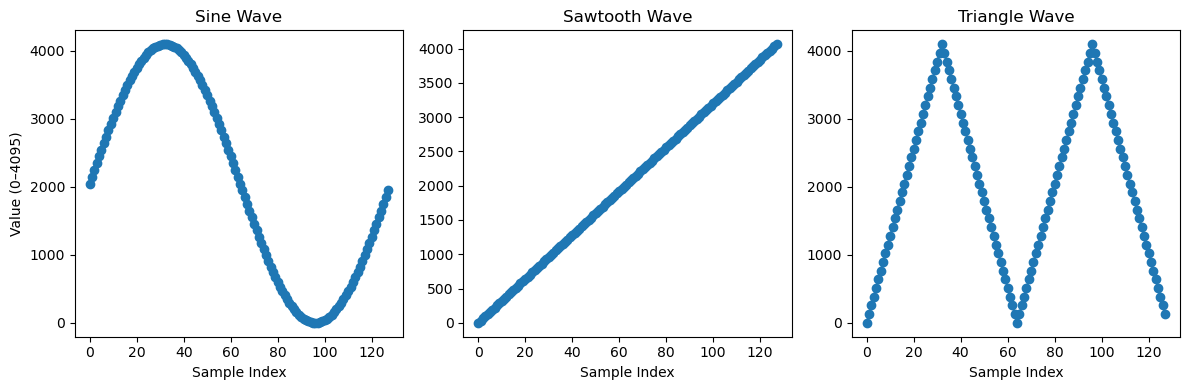

In [10]:
import numpy as np
import matplotlib.pyplot as plt

NS = 128
max_val = 4095
t = np.linspace(0, 1, NS, endpoint=False)

# Generate LUTs
sine      = ((np.sin(2*np.pi*t)+1)/2 * max_val).astype(int)
sawtooth  = (t * max_val).astype(int)
triangle  = (2*np.abs(2*t - np.floor(2*t + 0.5)) * max_val).astype(int)

# Print LUTs in C array format
for name, arr in zip(["Sine","Saw","Tri"], [sine, sawtooth, triangle]):
    print(f"{name} LUT = {{{', '.join(map(str, arr))}}};")

# Plot LUTs
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(sine, marker="o")
plt.title("Sine Wave")
plt.xlabel("Sample Index")
plt.ylabel("Value (0–4095)")

plt.subplot(1,3,2)
plt.plot(sawtooth, marker="o")
plt.title("Sawtooth Wave")
plt.xlabel("Sample Index")

plt.subplot(1,3,3)
plt.plot(triangle, marker="o")
plt.title("Triangle Wave")
plt.xlabel("Sample Index")

plt.tight_layout()
plt.show()


Piano LUT: [2047, 2311, 1786, 1467, 1609, 2026, 2420, 2065, 2012, 2140, 2087, 2035, 2006, 2038, 2048, 2041, 2044, 1950, 2070, 2086, 2051, 2042, 2053, 2036, 2060, 1744, 2128, 1624, 2024, 2042, 1923, 2091, 1766, 2215, 2417, 1955, 1903, 2149, 2022, 1998, 2241, 1649, 2202, 2040, 2125, 3153, 2094, 2028, 1186, 1893, 2598, 2238, 2134, 1954, 1931, 2114, 1361, 2484, 1464, 1857, 1801, 2191, 2232, 2209, 2016, 2058, 2084, 2051, 2029, 1987, 2034, 2057, 2129, 2036, 2024, 2047, 2030, 2032, 2058, 1960, 2083, 2047, 2078, 2027, 2068, 2035, 2028, 1700, 2299, 1856, 2170, 2065, 2043, 2059, 2041, 1977, 2297, 2000, 1908, 1995, 2065, 2088, 2431, 2439, 1776, 2429, 2083, 2162, 1924, 2182, 2786, 1978, 1429, 1940, 2221, 2233, 2145, 2002, 1692, 2239, 2094, 2128, 1776, 2140, 2134, 2096, 1721, 1546, 1772, 2050, 2353, 2121, 2082, 2178, 2055, 1942, 2082, 2057, 2079, 2051, 2024, 1879, 2092, 2102, 2044, 2016, 2069, 2069, 2056, 2620, 2282, 1984, 2145, 2035, 2143, 1907, 2086, 2071, 2450, 2057, 1871, 2143, 2115, 2007, 1996

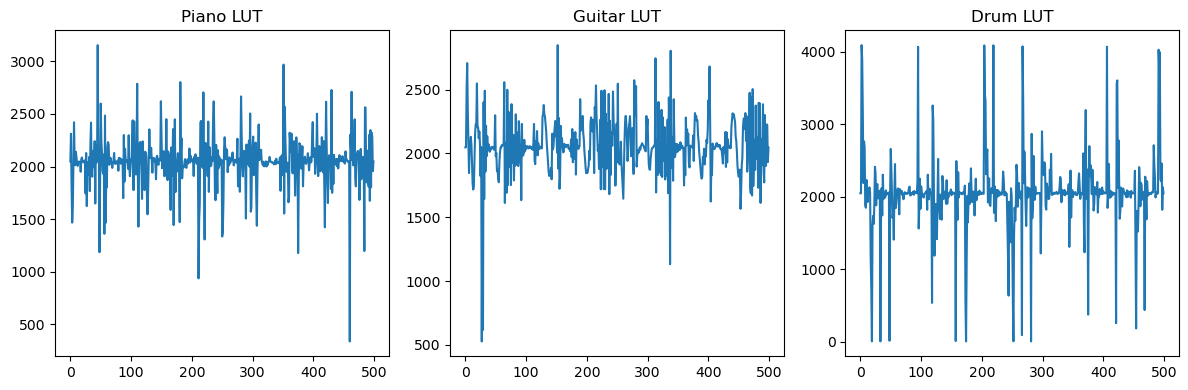

In [3]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def wav_to_lut(path):
    fs, data = wavfile.read(path)
    # convert stereo to mono
    if data.ndim > 1:      
        data = data.mean(axis=1)
    # normalize to -1..1
    data = data / np.max(np.abs(data))
    # pick 128 evenly spaced samples
    idx  = np.linspace(0, len(data)-1, 500).astype(int)
    lut  = ((data[idx] + 1)/2 * 4095).astype(int)
    return lut

# Load wav files
piano  = wav_to_lut(r"C:\Users\ramch\OneDrive - University of Cape Town\Fifth Year 2025\EEE3096S\prac_4\wave_files\piano.wav")
guitar = wav_to_lut(r"C:\Users\ramch\OneDrive - University of Cape Town\Fifth Year 2025\EEE3096S\prac_4\wave_files\guitar.wav")
drum   = wav_to_lut(r"C:\Users\ramch\OneDrive - University of Cape Town\Fifth Year 2025\EEE3096S\prac_4\wave_files\drum.wav")

# Print arrays (to copy into main.c later)
print("Piano LUT:", piano.tolist())
print("Guitar LUT:", guitar.tolist())
print("Drum LUT:", drum.tolist())

# Plot to verify waveforms
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.plot(piano); plt.title("Piano LUT")
plt.subplot(1,3,2); plt.plot(guitar); plt.title("Guitar LUT")
plt.subplot(1,3,3); plt.plot(drum); plt.title("Drum LUT")
plt.tight_layout()
plt.show()
